In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [232]:
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords
import re

import spacy
from nltk.tokenize import RegexpTokenizer
import nltk

In [134]:
national = pd.read_csv('./data/beige_book_national.csv')

In [135]:
national.head()

,Unnamed: 0,national_report,date
0,0,\n\r\n var ref = document.referrer;\r\n ...,2019-04
1,1,\n\r\n var ref = document.referrer;\r\n ...,2019-03
2,2,\n\r\n var ref = document.referrer;\r\n ...,2019-01
3,3,\n\r\n var ref = document.referrer;\r\n ...,2018-12
4,4,\n\r\n var ref = document.referrer;\r\n ...,2018-10


In [136]:
national.drop(columns='Unnamed: 0', inplace=True)

In [137]:
national.shape

(429, 2)

## Data Cleaning

### National Summary 

In [139]:
def html_to_words(raw_text):
    # Function to convert a document to a string of words
    
    # 1. Remove HTML.
    document = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", document)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english')) 
    extra = ['http','https','www','com','@','...','…', 'var', 'ref', 'document', 
             'referrer', 'var', 'bbpath', 'href', 'archive', 'function', 'beige',
            'book', 'federal', 'reserve', 'summary', 'indexof', 'backtoresults',
            'history', 'go', 'else', 'window', 'location', 'back', 'search',
            'this', 'report', 'prepared', 'federal', 'reserve', 'bank', 'summarizes',
            'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august',
            'september', 'october', 'november', 'december', 'atlanta', 'boston', 'chicago',
            'cleveland', 'dallas', 'kansas', 'minneapolis', 'york', 'philadelphia', 
             'richmond', 'san', 'francisco', 'st', 'louis', 'officials', 'comments', 
             'views', 'commentary', 'national', 'based', 'information', 'collected',
             'received', 'contacts', 'outside', 'system']
    # 5. Remove stop words.
    meaningful_words = [word for word in words if not word in stops and word not in extra]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [140]:
# applies the html_to_words function on the minutes column
# and creates a new column with clean text

national['clean_text'] = national['national_report'].apply(html_to_words)
national.head()

,national_report,date,clean_text
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,overall economic activity economic activity ex...
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,city overall economic activity economic activi...
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,overall economic activity economic activity in...
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,overall economic activity twelve districts rep...
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,overall economic activity economic activity ex...


In [ ]:
#national['clean_text'][0]

In [142]:
# import tokenizer and stemmer
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

In [143]:
# define a function that takes in a text
# and tokenizes and stems each word
def stem_text(text):    
    stm = PorterStemmer()
    tokenized = word_tokenize(text)
    stem_tokes = []
    for toke in tokenized:
        stem_tokes.append(stm.stem(toke))
    stem_tokes

    combined = ''
    for stemmed in stem_tokes:
        combined += stemmed + ' '
    return combined

In [128]:
# # define a function that takes in a text
# # and tokenizes and lemmatizes that text
# def lem_text(text):    
#     lem = WordNetLemmatizer()
#     tokenizer = RegexpTokenizer('[A-Z]\w+')
#     tokenized = tokenizer.tokenize(text)
#     lemmed_tokes = []
#     for toke in tokenized:
#         lemmed_tokes.append(lem.lemmatize(toke))
#     lemmed_tokes

#     combined = ''
#     for lemmed in lemmed_tokes:
#         combined += lemmed + ' '
#     return combined

In [144]:
national['stemmed_text'] = national['clean_text'].apply(stem_text)
national.head()

,national_report,date,clean_text,stemmed_text
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,overall economic activity economic activity ex...,overal econom activ econom activ expand slight...
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,city overall economic activity economic activi...,citi overal econom activ econom activ continu ...
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,overall economic activity economic activity in...,overal econom activ econom activ increas u eig...
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,overall economic activity twelve districts rep...,overal econom activ twelv district report econ...
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,overall economic activity economic activity ex...,overal econom activ econom activ expand across...


In [ ]:
# national['lemmed_text'] = national['clean_text'].apply(lem_text)
# national.head()

## Extracting Nouns from Each Document

In [233]:
nlp = spacy.load('en') 

In [145]:
# generate bi_grams of nouns and non-nouns
def noun_notnoun(phrase):
    doc = nlp(phrase) # create spacy object
    token_not_noun = []
    notnoun_noun_list = []

    for item in doc:
        if item.pos_ != "NOUN": # separate nouns and not nouns
            token_not_noun.append(item.text)
        if item.pos_ == "NOUN":
            noun = item.text

    for notnoun in token_not_noun:
        notnoun_noun_list.append(notnoun + " " + noun)

    return notnoun_noun_list

In [146]:
national['nouns_notnouns'] = national['clean_text'].apply(noun_notnoun)
national.head()

,national_report,date,clean_text,stemmed_text,nouns_notnouns
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,overall economic activity economic activity ex...,overal econom activ econom activ expand slight...,"[overall activity, economic activity, economic..."
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,city overall economic activity economic activi...,citi overal econom activ econom activ continu ...,"[overall activity, economic activity, economic..."
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,overall economic activity economic activity in...,overal econom activ econom activ increas u eig...,"[overall activity, economic activity, economic..."
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,overall economic activity twelve districts rep...,overal econom activ twelv district report econ...,"[overall activity, economic activity, twelve a..."
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,overall economic activity economic activity ex...,overal econom activ econom activ expand across...,"[overall activity, economic activity, economic..."


In [147]:
national['nouns_notnouns'][20]

['reports year',
 'twelve year',
 'suggest year',
 'economic year',
 'continued year',
 'expand year',
 'late year',
 'early year',
 'indicated year',
 'modest year',
 'moderate year',
 'however year',
 'new year',
 'reported year',
 'overall year',
 'compared year',
 'previous year',
 'improved year',
 'mostly year',
 'positive year',
 'expected year',
 'continue year',
 'slight year',
 'moderate year',
 'several year',
 'remained year',
 'tight year',
 'modest year',
 'noted year',
 'reporting year',
 'characterized year',
 'fairly year',
 'flat year',
 'increased year',
 'slightly year',
 'net year',
 'mixed year',
 'strong year',
 'continued year',
 'manufactured year',
 'according year',
 'saw year',
 'uptick year',
 'retail year',
 'modest year',
 'ahead year',
 'reports year',
 'varied year',
 'across year',
 'demand year',
 'nonfinancial year',
 'generally year',
 'increased year',
 'noted year',
 'steady year',
 'higher year',
 'related year',
 'rose year',
 'commented year',


In [148]:
# define a function to extract a text's nouns 
# and return them in a single string,
# so that the string can then be added back into the dataframe

def extract_noun(text):
    document = nlp(text)
    nouns = []
    for token in document:
        if token.pos_ == 'NOUN':
            nouns.append(str(token))   
    #print(NOUNS)
    combined = ''
    for token in nouns:
        combined += token + ' '
    return combined

In [149]:
len(extract_noun(national['national_report'][100]))

4209

In [150]:
len(national['national_report'][100])

13765

In [151]:
national['nouns'] = national['clean_text'].apply(extract_noun)
national.head()

,national_report,date,clean_text,stemmed_text,nouns_notnouns,nouns
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,overall economic activity economic activity ex...,overal econom activ econom activ expand slight...,"[overall activity, economic activity, economic...",activity activity pace districts growth pace d...
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,city overall economic activity economic activi...,citi overal econom activ econom activ continu ...,"[overall activity, economic activity, economic...",city activity activity districts growth condit...
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,overall economic activity economic activity in...,overal econom activ econom activ increas u eig...,"[overall activity, economic activity, economic...",activity activity districts growth nonauto ret...
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,overall economic activity twelve districts rep...,overal econom activ twelv district report econ...,"[overall activity, economic activity, twelve a...",activity districts economies pace mid growth p...
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,overall economic activity economic activity ex...,overal econom activ econom activ expand across...,"[overall activity, economic activity, economic...",activity activity states majority districts gr...


In [152]:
# define a function to extract a text's proper nouns 
# and return them in a single string,
# so that the string can then be added back into the dataframe

def extract_prpnoun(text):
    document = nlp(text)
    PROPN = []
    for token in document:
        if token.pos_ == 'PROPN':
            PROPN.append(str(token))   
    #print(PROPN)
    combined = ''
    for token in PROPN:
        combined += token + ' '
    return combined

In [153]:
len(extract_prpnoun(national['national_report'][0]))

589

In [154]:
len(national['national_report'][0])

8141

In [155]:
national['proper_nouns'] = national['clean_text'].apply(extract_noun)
national.head()

,national_report,date,clean_text,stemmed_text,nouns_notnouns,nouns,proper_nouns
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,overall economic activity economic activity ex...,overal econom activ econom activ expand slight...,"[overall activity, economic activity, economic...",activity activity pace districts growth pace d...,activity activity pace districts growth pace d...
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,city overall economic activity economic activi...,citi overal econom activ econom activ continu ...,"[overall activity, economic activity, economic...",city activity activity districts growth condit...,city activity activity districts growth condit...
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,overall economic activity economic activity in...,overal econom activ econom activ increas u eig...,"[overall activity, economic activity, economic...",activity activity districts growth nonauto ret...,activity activity districts growth nonauto ret...
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,overall economic activity twelve districts rep...,overal econom activ twelv district report econ...,"[overall activity, economic activity, twelve a...",activity districts economies pace mid growth p...,activity districts economies pace mid growth p...
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,overall economic activity economic activity ex...,overal econom activ econom activ expand across...,"[overall activity, economic activity, economic...",activity activity states majority districts gr...,activity activity states majority districts gr...


# Colocations

Collocations are expressions of multiple words which commonly co-occur.

In [178]:
# Extracting words from each document

# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') # Regex here says to get full words but exclude digits

# Tokenizer Texts
dirty_text_tokens = [tokenizer.tokenize(token.lower().strip()) for token in national['national_report']]

# Initialize master list to populate
master_text_tokens = []

# For each dirty text, get list of clean tokens and append to master_text_tokens
for text in dirty_text_tokens:
    # Create template for clean tokens to populate for this particular text
    clean_text_tokens = []
    # For each word/token in each document, make sure it is not a stopword 
    # or URL piece or main search term 
    for word in text:
        if ((word not in stopwords.words('english')) and (word not in ['http','https','www','com','@','...','…', 'var', 'ref', 'document', 
             'referrer', 'var', 'bbpath', 'href', 'archive', 'function', 'beige',
            'book', 'federal', 'reserve', 'summary', 'indexof', 'backtoresults',
            'history', 'go', 'else', 'window', 'location', 'back', 'search',
            'this', 'report', 'prepared', 'federal', 'reserve', 'bank', 'summarizes',
            'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august',
            'september', 'october', 'november', 'december', 'atlanta', 'boston', 'chicago',
            'cleveland', 'dallas', 'kansas', 'minneapolis', 'york', 'philadelphia', 
             'richmond', 'san', 'francisco', 'st', 'louis', 'officials', 'comments', 
             'views', 'commentary', 'national', 'based', 'information', 'collected',
             'received', 'contacts', 'outside', 'system', 'page', 'url', 'link'])):
            # Now extract it into clean token list
            clean_text_tokens.append(word)
    # Append this list of tokens to the master list
    master_text_tokens.append(clean_text_tokens)

In [275]:
# "de-lists" a list of lists. 
# That is, turns a list of lists into a single list
full_list = master_text_tokens[0]
for sub_list in master_text_tokens[1:]:
    full_list.extend(sub_list)

In [276]:
full_list[0]

'overall'

In [277]:
len(full_list)

641716

In [278]:
from nltk.collocations import *

In [279]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [280]:
finder = BigramCollocationFinder.from_words(full_list)
finder.nbest(bigram_measures.pmi, 20)

[('ac', 'cording'),
 ('adamant', 'opposition'),
 ('addressed', 'advertisements'),
 ('advertisements', 'parents'),
 ('ambitious', 'assumptions'),
 ('ax', 'moats'),
 ('birmingham', 'jacksonville'),
 ('bovine', 'tuberculosis'),
 ('carts', 'snowmobiles'),
 ('century', 'rollover'),
 ('citizens', 'teens'),
 ('clearest', 'impressions'),
 ('club', 'memberships'),
 ('colleges', 'tentatively'),
 ('complexities', 'irs'),
 ('constructive', 'workout'),
 ('court', 'decision'),
 ('crudely', 'clumsily'),
 ('dangerously', 'illiquid'),
 ('dazzle', 'imagination')]

*While these words are highly collocated, the expressions are also very infrequent. Therefore, it is useful to apply filters.*

In [281]:
# ignores all bigrams which occur less than n times in the corpus
finder.apply_freq_filter(5)
finder.nbest(bigram_measures.pmi, 20)

[('bed', 'methane'),
 ('flue', 'cured'),
 ('inaccurate', 'please'),
 ('please', 'notify'),
 ('site', 'fix'),
 ('stretch', 'outs'),
 ('terrorist', 'attacks'),
 ('wall', 'street'),
 ('bore', 'brunt'),
 ('discovered', 'broken'),
 ('notify', 'us'),
 ('referring', 'thank'),
 ('us', 'discovered'),
 ('marcellus', 'utica'),
 ('avian', 'influenza'),
 ('president', 'speech'),
 ('elective', 'procedures'),
 ('broken', 'site'),
 ('description', 'referring'),
 ('object', 'requested')]

In [283]:
finder = TrigramCollocationFinder.from_words(full_list)
finder.nbest(trigram_measures.pmi, 20)

[('addressed', 'advertisements', 'parents'),
 ('fleeing', 'escape', 'harsher'),
 ('golf', 'carts', 'snowmobiles'),
 ('ml', 'erupt', 'reigniting'),
 ('motorcycles', 'golf', 'carts'),
 ('northerners', 'fleeing', 'escape'),
 ('urn', 'ax', 'moats'),
 ('vaccinated', 'bovine', 'tuberculosis'),
 ('ambitious', 'assumptions', 'justify'),
 ('assumptions', 'justify', 'transaction'),
 ('attended', 'mardi', 'gras'),
 ('regain', 'resident', 'populations'),
 ('underestimated', 'wrangling', 'chaos'),
 ('video', 'tape', 'recorders'),
 ('vrms', 'gpms', 'vmms'),
 ('austin', 'el', 'paso'),
 ('avocado', 'mango', 'foliage'),
 ('disney', 'experimental', 'prototype'),
 ('henry', 'kaufman', 'james'),
 ('james', 'leary', 'albert')]

*Using trigrams, we find some expressions that are frequently used. For instance, the expression "video tape recorder" and "attended mardi gras" are frequently used together.* 

In [284]:
# ignores all trigrams which occur less than n times in the corpus
finder.apply_freq_filter(5)
finder.nbest(trigram_measures.pmi, 20)

[('inaccurate', 'please', 'notify'),
 ('notify', 'us', 'discovered'),
 ('please', 'notify', 'us'),
 ('broken', 'site', 'fix'),
 ('description', 'referring', 'thank'),
 ('discovered', 'broken', 'site'),
 ('us', 'discovered', 'broken'),
 ('followed', 'inaccurate', 'please'),
 ('appearance', 'mad', 'cow'),
 ('flue', 'cured', 'tobacco'),
 ('fix', 'provide', 'description'),
 ('site', 'fix', 'provide'),
 ('server', 'followed', 'inaccurate'),
 ('mad', 'cow', 'disease'),
 ('provide', 'description', 'referring'),
 ('co', 'op', 'condo'),
 ('file', 'found', 'object'),
 ('rocky', 'mountain', 'ski'),
 ('found', 'object', 'requested'),
 ('object', 'requested', 'found')]

In [304]:
list(nltk.bigrams(full_list))
from nltk import FreqDist

Fdist = FreqDist(list(nltk.bigrams(full_list)))

In [305]:
Fdist.most_common(10)

[(('real', 'estate'), 2746),
 (('districts', 'reported'), 2745),
 (('city', 'districts'), 2032),
 (('several', 'districts'), 1963),
 (('loan', 'demand'), 1522),
 (('retail', 'sales'), 1438),
 (('consumer', 'spending'), 1388),
 (('districts', 'noted'), 1151),
 (('district', 'reported'), 1108),
 (('new', 'districts'), 1044)]

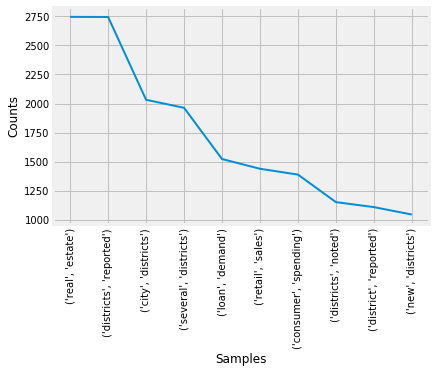

In [306]:
Fdist.plot(10)

In [313]:
#x = [i[0].join(",") for i in Fdist.most_common(10)]
y = [i[1] for i in Fdist.most_common(10)]

x = [i[0][0] + " " + i[0][1] for i in Fdist.most_common(10)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

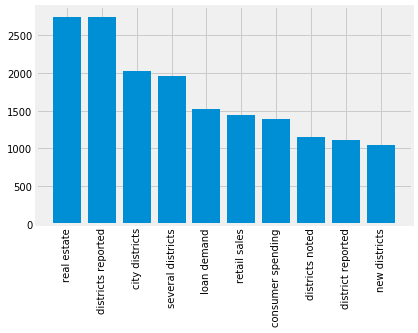

In [315]:
plt.bar(x, y)
plt.xticks(rotation=90)

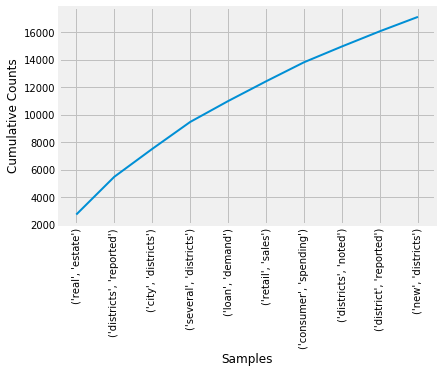

In [307]:
Fdist.plot(10, cumulative=True)

After applying filters, we now observe more meaningful expressions. For example,('sports', 'utility', 'vehicles') is an expression used frequently.  

We may similarly find collocations among spanning intervening words.

In [285]:
finder = BigramCollocationFinder.from_words(full_list)

finder.apply_freq_filter(3)
ignored_words = nltk.corpus.stopwords.words('english')

finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('real', 'estate'),
 ('consumer', 'spending'),
 ('loan', 'demand'),
 ('several', 'districts'),
 ('year', 'ago'),
 ('retail', 'sales'),
 ('labor', 'markets'),
 ('wage', 'pressures'),
 ('districts', 'reported'),
 ('commercial', 'real')]

In [286]:
# print('%0.4f' % bigram_measures.student_t(8, (15828, 4675), 14307668))

# print('%0.4f' % bigram_measures.student_t(20, (42, 20), 14307668))

In [287]:
# with open('full_list.txt', 'w') as f:
#     for item in full_list:
#         f.write("%s\n" % item)

In [288]:
# text = open('full_list.txt', 'r')

## Searching the National Summary

In [290]:
type(full_list)

list

In [295]:
# converts the list into NLTK text
full_text = nltk.Text(full_list)

In [296]:
type(full_text)

nltk.text.Text

*A concordance permits us to see words in context*

In [293]:
full_text.concordance('wages')

Displaying 25 of 1066 matches:
 future rainfall flooding employment wages employment continued increase nation
tricts reported moderate wage growth wages skilled unskilled positions generall
e range tariffs freight costs rising wages often cited key factors driving tren
firms expanded employment moderately wages climbed moderately wide range indust
modestly labor market remained tight wages increased balance nonlabor input cos
manufacturing little changed balance wages prices rose modestly financial condi
ty mixed across districts employment wages employment increased districts modes
easingly choosing enter labor market wages continued increase low high skilled 
districts reported moderately higher wages addition half districts noted rising
ment increased modestly many sectors wages grew moderately across board selling
district labor market remained tight wages increased average nonlabor input cos
nged consumer spending fell modestly wages rose modestly prices rose slightly f
ade polit

In [267]:
full_text.concordance('market', width=80, lines=10)

Displaying 10 of 692 matches:
attract retain employees tight labor market also led continued wage pressures di
y constrained expansions tight labor market constrained hiring spurred wage incr
ctivity district grew modestly labor market remained tight wages increased balan
continued expand moderate pace labor market conditions remained tight price infl
ts increasingly choosing enter labor market wages continued increase low high sk
y moderately expanded district labor market remained tight wages increased avera
continued expand moderate pace labor market conditions remained tight price infl
imistic response increased financial market volatility rising short term interes
mproved moderate pace district labor market remained tight wages creased average
continued expand moderate pace labor market conditions remained tight price infl


In [294]:
full_text.similar('wages')

districts prices reported new district city sales noted activity
retail mixed demand however home firms increased manufacturers reports
generally indicated


In [297]:
full_text.common_contexts(['wages', 'market'])

tight_skilled reported_temporary


In [298]:
full_text.common_contexts(['economy', 'employment'])

modestly_continued said_expanded overall_gains


In [299]:
full_text.common_contexts(['wages', 'firms'])

said_increased districts_remained pressure_district retail_reported
employment_districts prices_district increases_generally
district_reported manufacturing_city reported_continued
manufacturing_continued manufacturing_increased although_reported
employment_several reported_retail


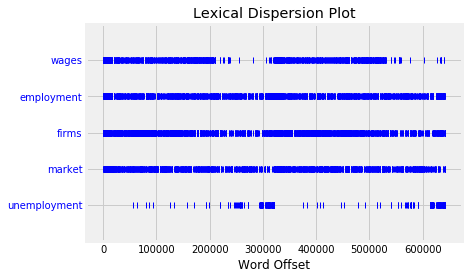

In [301]:
full_text.dispersion_plot(["wages", "employment", "firms", "market", "unemployment"])